___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [10]:
df2 = df.drop(["RowNumber","CustomerId","Surname",],axis=1)

In [11]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


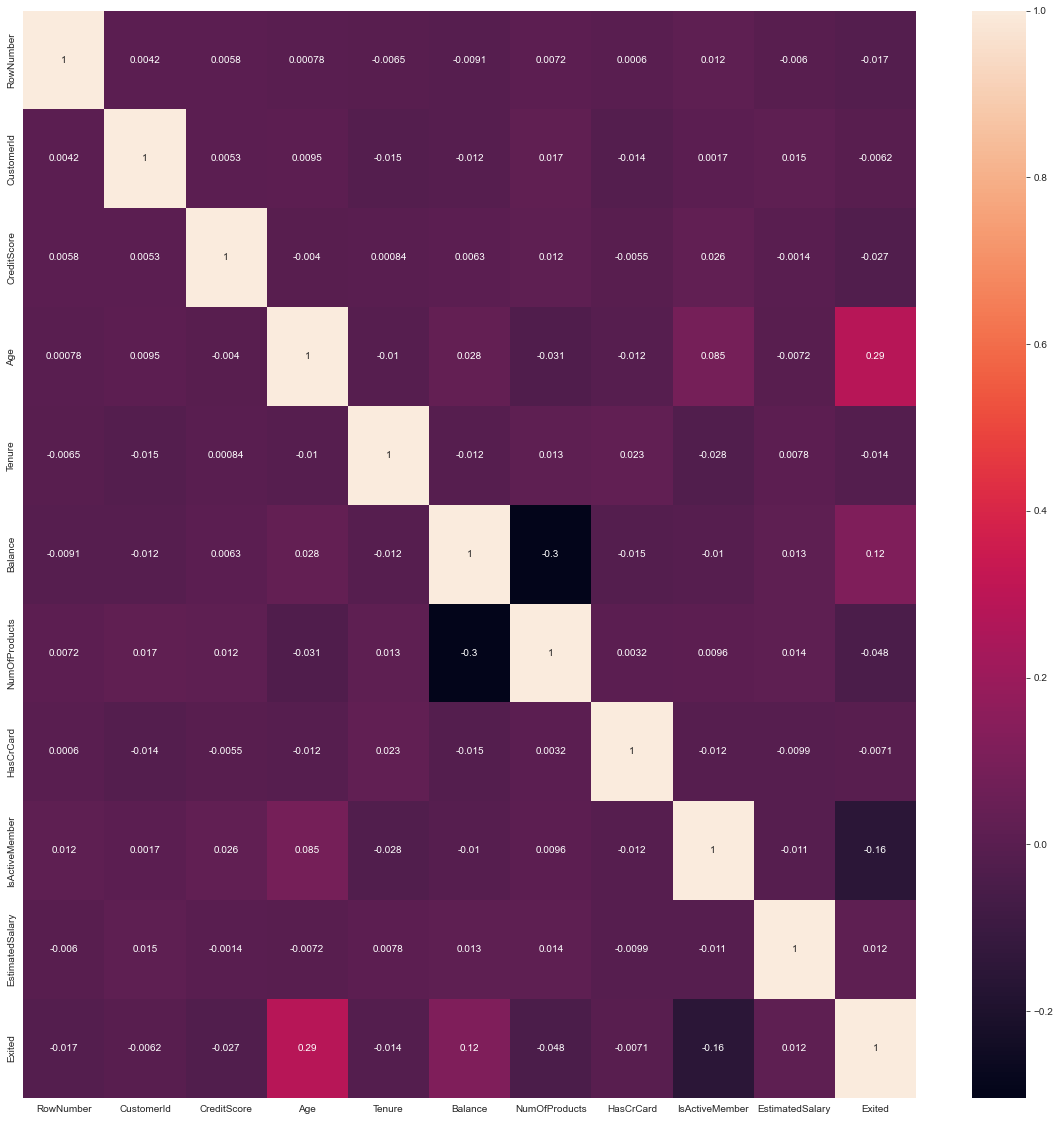

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

<AxesSubplot:xlabel='Gender', ylabel='count'>

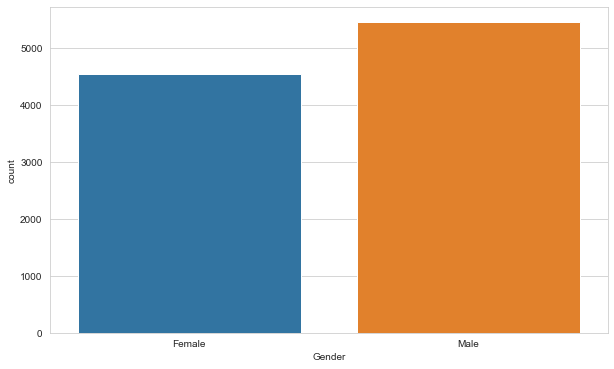

In [13]:
sns.countplot(df["Gender"])

<AxesSubplot:xlabel='Geography', ylabel='count'>

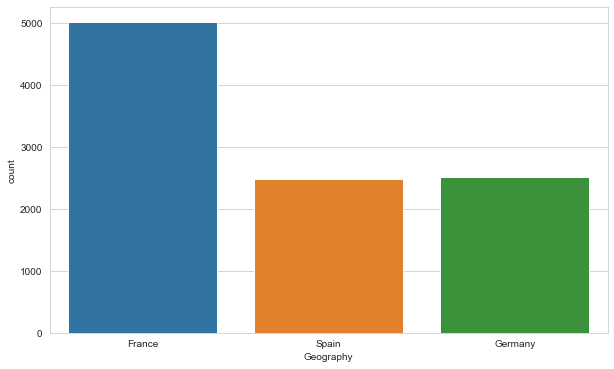

In [14]:
sns.countplot(df["Geography"])

<AxesSubplot:xlabel='Age', ylabel='count'>

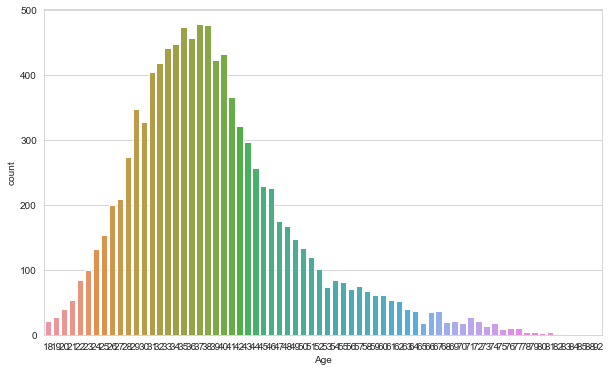

In [15]:
sns.countplot(df["Age"])

<AxesSubplot:xlabel='CreditScore'>

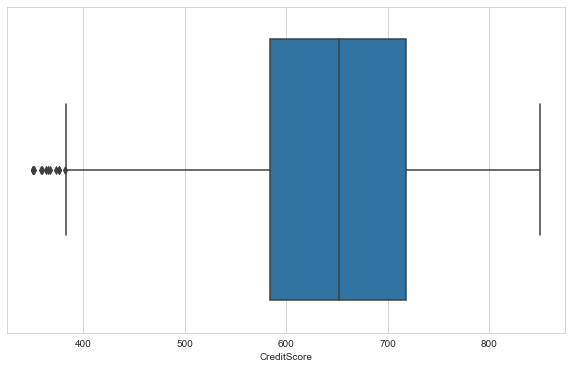

In [16]:
sns.boxplot(df["CreditScore"])

<AxesSubplot:xlabel='Balance'>

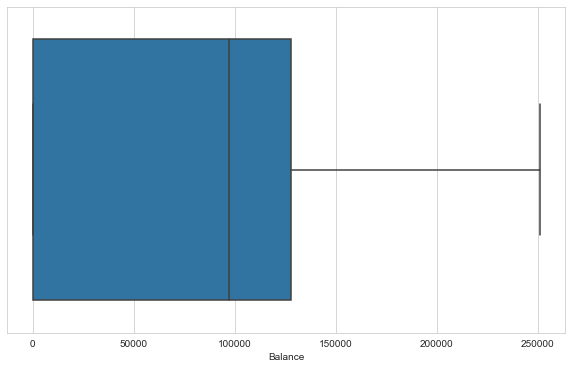

In [17]:
sns.boxplot(df["Balance"])

<AxesSubplot:xlabel='EstimatedSalary'>

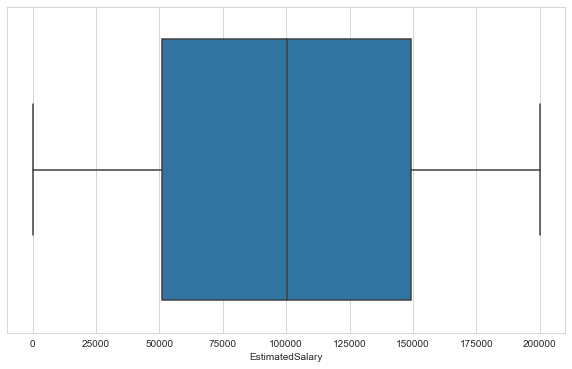

In [18]:
sns.boxplot(df["EstimatedSalary"])

<AxesSubplot:xlabel='Tenure', ylabel='count'>

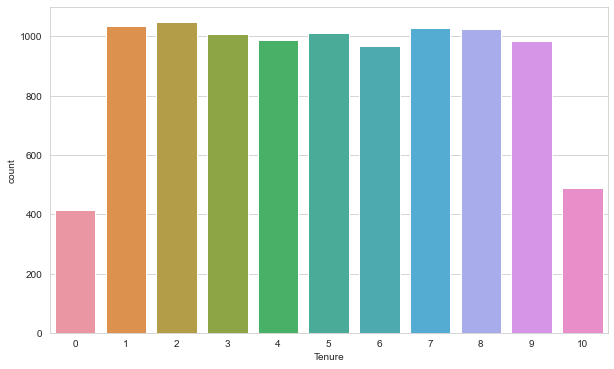

In [19]:
sns.countplot(df["Tenure"])

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

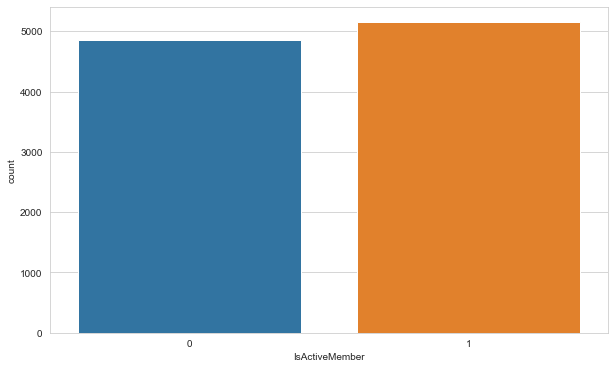

In [20]:
sns.countplot(df["IsActiveMember"])

<AxesSubplot:xlabel='Exited', ylabel='count'>

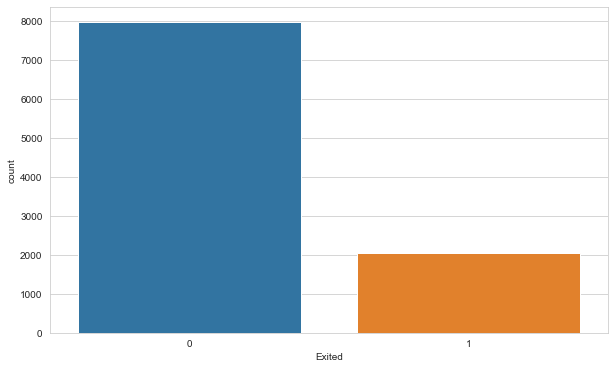

In [21]:
sns.countplot(df["Exited"])

In [22]:
df2.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


<AxesSubplot:xlabel='Gender', ylabel='count'>

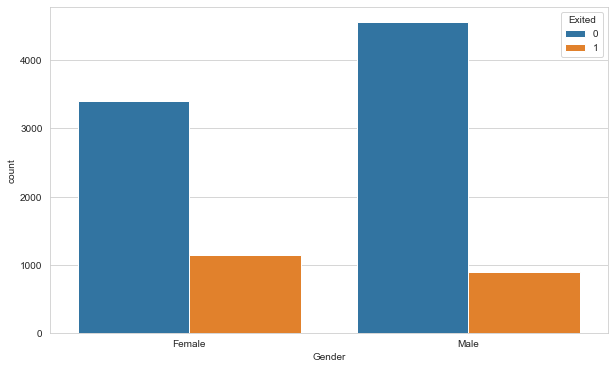

In [24]:
sns.countplot(df["Gender"],hue=df["Exited"])

In [25]:
100* df2.isnull().sum()/len(df2)

CreditScore       0.000
Geography         0.000
Gender            0.000
Age               0.000
Tenure            0.000
Balance           0.000
NumOfProducts     0.000
HasCrCard         0.000
IsActiveMember    0.000
EstimatedSalary   0.000
Exited            0.000
dtype: float64

In [26]:
#AGE DROP EDİLEBİLİR df2 = df2.drop("Age",axis=1)

In [27]:
df2 = pd.get_dummies(df2, columns=["Geography","Gender"])

In [28]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0


In [43]:
df2 = df2.drop("Age",axis=1)

In [44]:
df2.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0


## Preprocessing of Data
- Train | Test Split, Scalling

In [45]:
X = df2.drop("Exited",axis=1)

y = df2["Exited"]

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
scaler.fit(X_train)

MinMaxScaler()

In [50]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

### Creating Model

### without class_weigth

In [51]:
X_train.shape

(8000, 12)

In [52]:
y_train.shape

(8000,)

#### Evaluate

In [55]:
model = Sequential()
model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
250/250 [==============================] - 0s 781us/step - loss: 0.5135 - accuracy: 0.7918 - val_loss: 0.4667 - val_accuracy: 0.8035
Epoch 2/500
250/250 [==============================] - 0s 507us/step - loss: 0.4789 - accuracy: 0.7929 - val_loss: 0.4629 - val_accuracy: 0.8045
Epoch 3/500
250/250 [==============================] - 0s 499us/step - loss: 0.4750 - accuracy: 0.7944 - val_loss: 0.4595 - val_accuracy: 0.8055
Epoch 4/500
250/250 [==============================] - 0s 511us/step - loss: 0.4674 - accuracy: 0.7962 - val_loss: 0.4462 - val_accuracy: 0.8060
Epoch 5/500
250/250 [==============================] - 0s 507us/step - loss: 0.4486 - accuracy: 0.7999 - val_loss: 0.4245 - val_accuracy: 0.8170
Epoch 6/500
250/250 [==============================] - 0s 574us/step - loss: 0.4242 - accuracy: 0.8108 - val_loss: 0.4092 - val_accuracy: 0.8285
Epoch 7/500
250/250 [==============================] - 0s 586us/step - loss: 0.4083 - accuracy: 0.8176 - val_loss: 0.4012 - val_ac

250/250 [==============================] - 0s 495us/step - loss: 0.3846 - accuracy: 0.8288 - val_loss: 0.4002 - val_accuracy: 0.8260
Epoch 56/500
250/250 [==============================] - 0s 567us/step - loss: 0.3845 - accuracy: 0.8265 - val_loss: 0.4015 - val_accuracy: 0.8235
Epoch 57/500
250/250 [==============================] - 0s 479us/step - loss: 0.3860 - accuracy: 0.8276 - val_loss: 0.3994 - val_accuracy: 0.8260
Epoch 58/500
250/250 [==============================] - 0s 553us/step - loss: 0.3843 - accuracy: 0.8270 - val_loss: 0.3982 - val_accuracy: 0.8285
Epoch 59/500
250/250 [==============================] - 0s 513us/step - loss: 0.3851 - accuracy: 0.8264 - val_loss: 0.3994 - val_accuracy: 0.8250
Epoch 60/500
250/250 [==============================] - 0s 570us/step - loss: 0.3848 - accuracy: 0.8254 - val_loss: 0.3980 - val_accuracy: 0.8260
Epoch 61/500
250/250 [==============================] - 0s 559us/step - loss: 0.3852 - accuracy: 0.8266 - val_loss: 0.3990 - val_accuracy

250/250 [==============================] - 0s 662us/step - loss: 0.3807 - accuracy: 0.8292 - val_loss: 0.3986 - val_accuracy: 0.8260
Epoch 112/500
250/250 [==============================] - 0s 551us/step - loss: 0.3808 - accuracy: 0.8291 - val_loss: 0.4022 - val_accuracy: 0.8245
Epoch 113/500
250/250 [==============================] - 0s 543us/step - loss: 0.3815 - accuracy: 0.8288 - val_loss: 0.4024 - val_accuracy: 0.8260
Epoch 114/500
250/250 [==============================] - 0s 559us/step - loss: 0.3807 - accuracy: 0.8298 - val_loss: 0.3993 - val_accuracy: 0.8305
Epoch 115/500
250/250 [==============================] - 0s 558us/step - loss: 0.3798 - accuracy: 0.8299 - val_loss: 0.4015 - val_accuracy: 0.8270
Epoch 116/500
250/250 [==============================] - 0s 646us/step - loss: 0.3804 - accuracy: 0.8284 - val_loss: 0.4044 - val_accuracy: 0.8235
Epoch 117/500
250/250 [==============================] - 0s 666us/step - loss: 0.3802 - accuracy: 0.8304 - val_loss: 0.4014 - val_ac

Epoch 167/500
250/250 [==============================] - 0s 561us/step - loss: 0.3780 - accuracy: 0.8298 - val_loss: 0.4050 - val_accuracy: 0.8205
Epoch 168/500
250/250 [==============================] - 0s 533us/step - loss: 0.3757 - accuracy: 0.8326 - val_loss: 0.4014 - val_accuracy: 0.8250
Epoch 169/500
250/250 [==============================] - 0s 495us/step - loss: 0.3772 - accuracy: 0.8304 - val_loss: 0.4018 - val_accuracy: 0.8290
Epoch 170/500
250/250 [==============================] - 0s 519us/step - loss: 0.3763 - accuracy: 0.8322 - val_loss: 0.4016 - val_accuracy: 0.8230
Epoch 171/500
250/250 [==============================] - 0s 606us/step - loss: 0.3762 - accuracy: 0.8295 - val_loss: 0.4029 - val_accuracy: 0.8280
Epoch 172/500
250/250 [==============================] - 0s 630us/step - loss: 0.3758 - accuracy: 0.8320 - val_loss: 0.4020 - val_accuracy: 0.8265
Epoch 173/500
250/250 [==============================] - 0s 487us/step - loss: 0.3769 - accuracy: 0.8303 - val_loss: 0

Epoch 223/500
250/250 [==============================] - 0s 507us/step - loss: 0.3721 - accuracy: 0.8334 - val_loss: 0.4059 - val_accuracy: 0.8250
Epoch 224/500
250/250 [==============================] - 0s 507us/step - loss: 0.3715 - accuracy: 0.8340 - val_loss: 0.4061 - val_accuracy: 0.8270
Epoch 225/500
250/250 [==============================] - 0s 497us/step - loss: 0.3713 - accuracy: 0.8328 - val_loss: 0.4099 - val_accuracy: 0.8285
Epoch 226/500
250/250 [==============================] - 0s 497us/step - loss: 0.3722 - accuracy: 0.8324 - val_loss: 0.4060 - val_accuracy: 0.8275
Epoch 227/500
250/250 [==============================] - 0s 503us/step - loss: 0.3720 - accuracy: 0.8319 - val_loss: 0.4077 - val_accuracy: 0.8295
Epoch 228/500
250/250 [==============================] - 0s 521us/step - loss: 0.3710 - accuracy: 0.8346 - val_loss: 0.4054 - val_accuracy: 0.8295
Epoch 229/500
250/250 [==============================] - 0s 507us/step - loss: 0.3710 - accuracy: 0.8334 - val_loss: 0

Epoch 279/500
250/250 [==============================] - 0s 491us/step - loss: 0.3677 - accuracy: 0.8363 - val_loss: 0.4085 - val_accuracy: 0.8275
Epoch 280/500
250/250 [==============================] - 0s 483us/step - loss: 0.3697 - accuracy: 0.8388 - val_loss: 0.4161 - val_accuracy: 0.8210
Epoch 281/500
250/250 [==============================] - 0s 491us/step - loss: 0.3673 - accuracy: 0.8342 - val_loss: 0.4121 - val_accuracy: 0.8220
Epoch 282/500
250/250 [==============================] - 0s 495us/step - loss: 0.3662 - accuracy: 0.8370 - val_loss: 0.4280 - val_accuracy: 0.8120
Epoch 283/500
250/250 [==============================] - 0s 535us/step - loss: 0.3691 - accuracy: 0.8353 - val_loss: 0.4109 - val_accuracy: 0.8295
Epoch 284/500
250/250 [==============================] - 0s 527us/step - loss: 0.3686 - accuracy: 0.8360 - val_loss: 0.4077 - val_accuracy: 0.8235
Epoch 285/500
250/250 [==============================] - 0s 495us/step - loss: 0.3679 - accuracy: 0.8361 - val_loss: 0

Epoch 335/500
250/250 [==============================] - 0s 650us/step - loss: 0.3643 - accuracy: 0.8372 - val_loss: 0.4085 - val_accuracy: 0.8315
Epoch 336/500
250/250 [==============================] - 0s 682us/step - loss: 0.3642 - accuracy: 0.8372 - val_loss: 0.4111 - val_accuracy: 0.8295
Epoch 337/500
250/250 [==============================] - 0s 551us/step - loss: 0.3643 - accuracy: 0.8394 - val_loss: 0.4102 - val_accuracy: 0.8285
Epoch 338/500
250/250 [==============================] - 0s 527us/step - loss: 0.3654 - accuracy: 0.8375 - val_loss: 0.4098 - val_accuracy: 0.8265
Epoch 339/500
250/250 [==============================] - 0s 489us/step - loss: 0.3630 - accuracy: 0.8389 - val_loss: 0.4104 - val_accuracy: 0.8270
Epoch 340/500
250/250 [==============================] - 0s 511us/step - loss: 0.3642 - accuracy: 0.8382 - val_loss: 0.4106 - val_accuracy: 0.8290
Epoch 341/500
250/250 [==============================] - 0s 565us/step - loss: 0.3645 - accuracy: 0.8388 - val_loss: 0

250/250 [==============================] - 0s 491us/step - loss: 0.3619 - accuracy: 0.8381 - val_loss: 0.4156 - val_accuracy: 0.8265
Epoch 391/500
250/250 [==============================] - 0s 487us/step - loss: 0.3605 - accuracy: 0.8411 - val_loss: 0.4134 - val_accuracy: 0.8265
Epoch 392/500
250/250 [==============================] - 0s 499us/step - loss: 0.3613 - accuracy: 0.8385 - val_loss: 0.4201 - val_accuracy: 0.8255
Epoch 393/500
250/250 [==============================] - 0s 487us/step - loss: 0.3621 - accuracy: 0.8405 - val_loss: 0.4128 - val_accuracy: 0.8275
Epoch 394/500
250/250 [==============================] - 0s 515us/step - loss: 0.3606 - accuracy: 0.8403 - val_loss: 0.4134 - val_accuracy: 0.8245
Epoch 395/500
250/250 [==============================] - 0s 559us/step - loss: 0.3612 - accuracy: 0.8404 - val_loss: 0.4164 - val_accuracy: 0.8265
Epoch 396/500
250/250 [==============================] - 0s 630us/step - loss: 0.3608 - accuracy: 0.8400 - val_loss: 0.4128 - val_ac

Epoch 446/500
250/250 [==============================] - 0s 498us/step - loss: 0.3587 - accuracy: 0.8425 - val_loss: 0.4295 - val_accuracy: 0.8235
Epoch 447/500
250/250 [==============================] - 0s 498us/step - loss: 0.3575 - accuracy: 0.8424 - val_loss: 0.4147 - val_accuracy: 0.8250
Epoch 448/500
250/250 [==============================] - 0s 483us/step - loss: 0.3574 - accuracy: 0.8397 - val_loss: 0.4255 - val_accuracy: 0.8190
Epoch 449/500
250/250 [==============================] - 0s 491us/step - loss: 0.3593 - accuracy: 0.8403 - val_loss: 0.4202 - val_accuracy: 0.8280
Epoch 450/500
250/250 [==============================] - 0s 598us/step - loss: 0.3576 - accuracy: 0.8415 - val_loss: 0.4166 - val_accuracy: 0.8315
Epoch 451/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8406 - val_loss: 0.4173 - val_accuracy: 0.8275
Epoch 452/500
250/250 [==============================] - 0s 634us/step - loss: 0.3581 - accuracy: 0.8430 - val_loss: 0.4

In [57]:
model_loss = pd.DataFrame(model.history.history)

In [58]:
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.513,0.792,0.467,0.803
1,0.479,0.793,0.463,0.804
2,0.475,0.794,0.459,0.805
3,0.467,0.796,0.446,0.806
4,0.449,0.800,0.424,0.817


In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 871
Trainable params: 871
Non-trainable params: 0
_________________________________________________________________


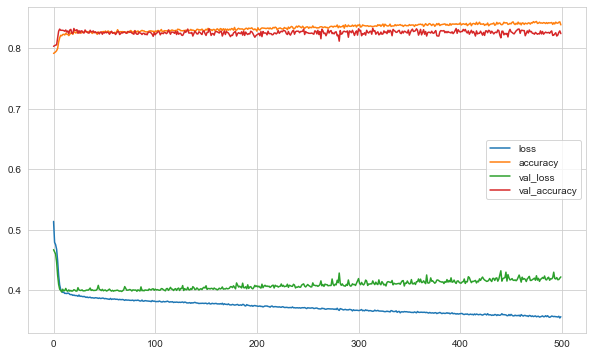

In [59]:
model_loss.plot();

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [97]:
from sklearn.utils import class_weight

In [98]:
model = Sequential()

tf.random.set_seed(101)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [99]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6293266205160478, 1: 2.4330900243309004}

In [100]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6953 - recall: 0.6174 - val_loss: 0.6512 - val_recall: 0.4331
Epoch 2/200
57/57 [==============================] - 0s 1ms/step - loss: 0.6671 - recall: 0.4479 - val_loss: 0.6384 - val_recall: 0.5096
Epoch 3/200
57/57 [==============================] - 0s 924us/step - loss: 0.6560 - recall: 0.5454 - val_loss: 0.6244 - val_recall: 0.6242
Epoch 4/200
57/57 [==============================] - 0s 929us/step - loss: 0.6511 - recall: 0.5884 - val_loss: 0.6061 - val_recall: 0.5796
Epoch 5/200
57/57 [==============================] - 0s 920us/step - loss: 0.6492 - recall: 0.5642 - val_loss: 0.6091 - val_recall: 0.5796
Epoch 6/200
57/57 [==============================] - 0s 875us/step - loss: 0.6469 - recall: 0.5716 - val_loss: 0.6320 - val_recall: 0.6497
Epoch 7/200
57/57 [==============================] - 0s 709us/step - loss: 0.6464 - recall: 0.5992 - val_loss: 0.6254 - val_recall: 0.6369
Epoch 8/200
57/57 [============

#### Evaluate

<AxesSubplot:>

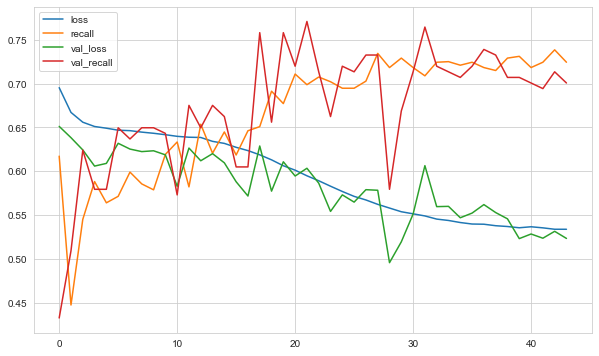

In [101]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [102]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#      precision    recall  f1-score   support

#  0       0.86      0.97      0.92       796
#  1       0.79      0.41      0.54       204


[[1180  427]
 [ 121  272]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1607
           1       0.39      0.69      0.50       393

    accuracy                           0.73      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.81      0.73      0.75      2000



## GridSearchCV

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [66]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [67]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [70]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [74]:
tf.random.set_seed(101)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
225/225 [==============================] - 0s 751us/step - loss: 0.4916 - accuracy: 0.7846 - val_loss: 0.4445 - val_accuracy: 0.8138
Epoch 2/200
225/225 [==============================] - 0s 499us/step - loss: 0.4683 - accuracy: 0.7947 - val_loss: 0.4161 - val_accuracy: 0.8238
Epoch 3/200
225/225 [==============================] - 0s 477us/step - loss: 0.4224 - accuracy: 0.8114 - val_loss: 0.3893 - val_accuracy: 0.8350
Epoch 4/200
225/225 [==============================] - 0s 483us/step - loss: 0.4055 - accuracy: 0.8194 - val_loss: 0.3970 - val_accuracy: 0.8263
Epoch 5/200
225/225 [==============================] - 0s 472us/step - loss: 0.4017 - accuracy: 0.8213 - val_loss: 0.3949 - val_accuracy: 0.8300
Epoch 6/200
225/225 [==============================] - 0s 566us/step - loss: 0.3992 - accuracy: 0.8228 - val_loss: 0.3925 - val_accuracy: 0.8350
Epoch 7/200
225/225 [==============================] - 0s 464us/ste

GridSearchCV(cv=10,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001D416359580>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>,
                                       <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'tensorflow.python.keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'tensorflow.python.keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [75]:
grid_model.best_score_

0.822875

In [76]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.003,
 'optimizer': tensorflow.python.keras.optimizer_v2.nadam.Nadam}

#### Evaluate

In [77]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]]
grid_result

,mean_test_score,std_test_score,rank_test_score,params
0,0.820,0.013,8,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
1,0.820,0.012,7,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
2,0.794,0.016,23,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
3,0.820,0.012,8,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
4,0.816,0.016,17,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
5,0.817,0.014,15,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
6,0.794,0.016,19,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
7,0.823,0.012,1,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
8,0.820,0.014,10,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
9,0.823,0.016,3,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."


## Final Model and Model Deployment

In [78]:
import pickle
pickle.dump(scaler, open("churn_prediction", 'wb'))

In [80]:
tf.random.set_seed(101)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [81]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [82]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
250/250 [==============================] - 0s 784us/step - loss: 0.5112 - accuracy: 0.7749 - val_loss: 0.4667 - val_accuracy: 0.8085
Epoch 2/1000
250/250 [==============================] - 0s 545us/step - loss: 0.4754 - accuracy: 0.7951 - val_loss: 0.4597 - val_accuracy: 0.8095
Epoch 3/1000
250/250 [==============================] - 0s 527us/step - loss: 0.4708 - accuracy: 0.7946 - val_loss: 0.4534 - val_accuracy: 0.8060
Epoch 4/1000
250/250 [==============================] - 0s 514us/step - loss: 0.4599 - accuracy: 0.7983 - val_loss: 0.4404 - val_accuracy: 0.8050
Epoch 5/1000
250/250 [==============================] - 0s 562us/step - loss: 0.4391 - accuracy: 0.8048 - val_loss: 0.4227 - val_accuracy: 0.8155
Epoch 6/1000
250/250 [==============================] - 0s 699us/step - loss: 0.4202 - accuracy: 0.8154 - val_loss: 0.4121 - val_accuracy: 0.8190
Epoch 7/1000
250/250 [==============================] - 0s 626us/step - loss: 0.4083 - accuracy: 0.8175 - val_loss: 0.4049 -

Epoch 57/1000
250/250 [==============================] - 0s 500us/step - loss: 0.3848 - accuracy: 0.8278 - val_loss: 0.3967 - val_accuracy: 0.8320
Epoch 58/1000
250/250 [==============================] - 0s 520us/step - loss: 0.3847 - accuracy: 0.8271 - val_loss: 0.3968 - val_accuracy: 0.8315
Epoch 59/1000
250/250 [==============================] - 0s 614us/step - loss: 0.3846 - accuracy: 0.8265 - val_loss: 0.3975 - val_accuracy: 0.8320
Epoch 60/1000
250/250 [==============================] - 0s 530us/step - loss: 0.3842 - accuracy: 0.8265 - val_loss: 0.3995 - val_accuracy: 0.8290
Epoch 61/1000
250/250 [==============================] - 0s 490us/step - loss: 0.3843 - accuracy: 0.8292 - val_loss: 0.3972 - val_accuracy: 0.8320
Epoch 62/1000
250/250 [==============================] - 0s 512us/step - loss: 0.3836 - accuracy: 0.8279 - val_loss: 0.3958 - val_accuracy: 0.8315
Epoch 63/1000
250/250 [==============================] - 0s 579us/step - loss: 0.3843 - accuracy: 0.8291 - val_loss: 0

In [83]:
model.save('model_churn.h5')

### Prediction

In [84]:
from tensorflow.keras.models import load_model

In [89]:
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("churn_prediction", "rb"))

In [90]:
single_person = df2.drop('Exited', axis = 1).iloc[0:1, :]
single_person

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,2,0.000,1,1,1,101348.880,1,0,0,1,0


In [94]:
single_person = model_churn.transform(single_person)

In [95]:
df2["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___